# Módulo 06: Descritiva I
# Exercício 03: Gráficos


#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [58]:
# importando 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline      



# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('sinasci_RO_2019.csv')
df_sinasci = pd.DataFrame(arquivo)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [59]:
# categorização 'APGAR5' em um novo campo "apgar5_cat"

df_sinasci.loc[df_sinasci['APGAR5'] <= 3, 'apgar5_cat'] = 'asfixia severa'
df_sinasci.loc[(df_sinasci['APGAR5'] == 4) | (df_sinasci['APGAR5'] == 5), 'apgar5_cat'] = 'asfixia moderada'
df_sinasci.loc[(df_sinasci['APGAR5'] == 6) | (df_sinasci['APGAR5'] == 7), 'apgar5_cat'] = 'asfixia leve'
df_sinasci.loc[(df_sinasci['APGAR5'] >= 8), 'apgar5_cat'] = 'normal'

df_sinasci.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,apgar5_cat
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [81]:
# valores para a gestação

df_sinasci['GESTACAO'].unique()

['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas', '22 a 27 semanas', '28 a 31 semanas', NaN, 'Menos de 22 semanas']
Categories (6, object): ['Menos de 22 semanas' < '22 a 27 semanas' < '28 a 31 semanas' < '32 a 36 semanas' < '37 a 41 semanas' < '42 semanas e mais']

C:\Users\Cristina Notebook\AppData\Local\Temp\ipykernel_13908\1399590391.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='GESTACAO'


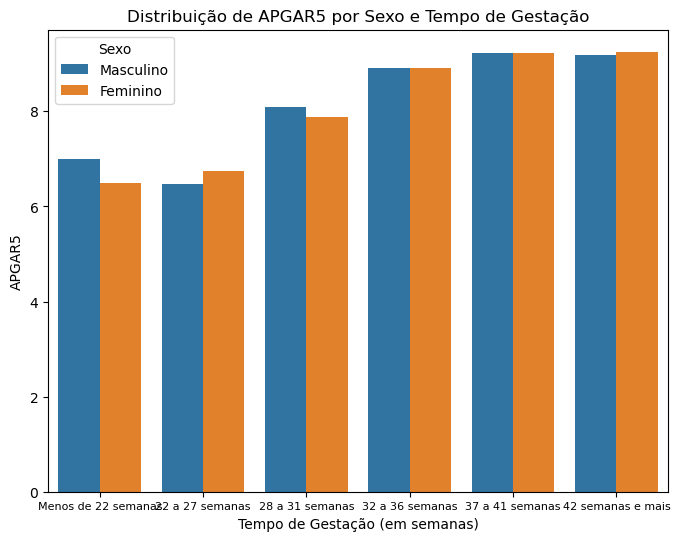

In [82]:
# BARPLOT: gráfico APGAR5 por Sexo x Tempo de Gestação

plt.figure(figsize=(8, 6))
ordem_gestacao = ['Menos de 22 semanas'
                 ,'22 a 27 semanas'
                 ,'28 a 31 semanas'
                 ,'32 a 36 semanas'
                 ,'37 a 41 semanas'
                 ,'42 semanas e mais']

ax = sns.barplot(x='GESTACAO'
                 , y='APGAR5'
                 , hue='SEXO'
                 , data=df_sinasci
                 , ci=None
                 , order = ordem_gestacao)

plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação (em semanas)')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper left')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

plt.show()




####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [83]:
# tabela cruzada com 'APGAR5' X 'GESTACAO'

tabela_cruzada = pd.crosstab(index=df_sinasci['GESTACAO'], columns=df_sinasci['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [84]:
# percentuais de linhas da distrivuição 'APGAR5' para cada 'GESTACAO'

percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1),axis=0)
percentual_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1000x600 with 0 Axes>

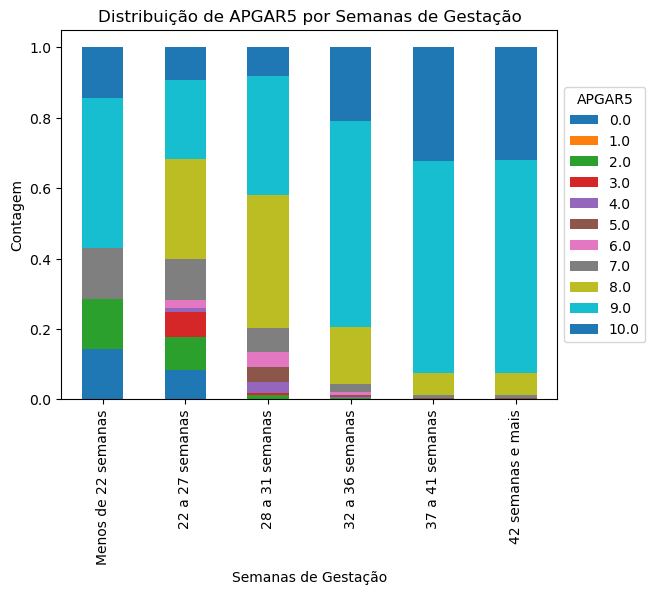

In [73]:
# PLOT: gráfico de barras

ordem_gestacao = ['Menos de 22 semanas'
                 ,'22 a 27 semanas'
                 ,'28 a 31 semanas'
                 ,'32 a 36 semanas'
                 ,'37 a 41 semanas'
                 ,'42 semanas e mais']

percentual_linha_invertida = percentual_linha.T
percentual_linha_invertida = percentual_linha_invertida[ordem_gestacao]
percentual_linha_invertida = percentual_linha_invertida.sort_index(axis=1)
percentual_linha_invertida = percentual_linha_invertida.T


plt.figure(figsize=(10, 6))
percentual_linha_invertida.plot(kind='bar', stacked=True)

plt.xlabel('Semanas de Gestação')
plt.ylabel('Contagem')
plt.title('Distribuição de APGAR5 por Semanas de Gestação')
plt.legend(title='APGAR5', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



Resposta: No gráfico existe uma tendência de quanto maior o tempo de gestação maior é o APGAR5. Em outras palavras, quanto maior o tempo de gestação maior a chance do bebê nascer "normal" (sem ou com pouca asfixia). O ponto fora da curva é a categoria de gestação "Menos de 22 semanas". Neste caso, muitos bebês nascem com APGAR5 9 e 10 mesmo com a fragilidade de uma nascimento prematuro. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

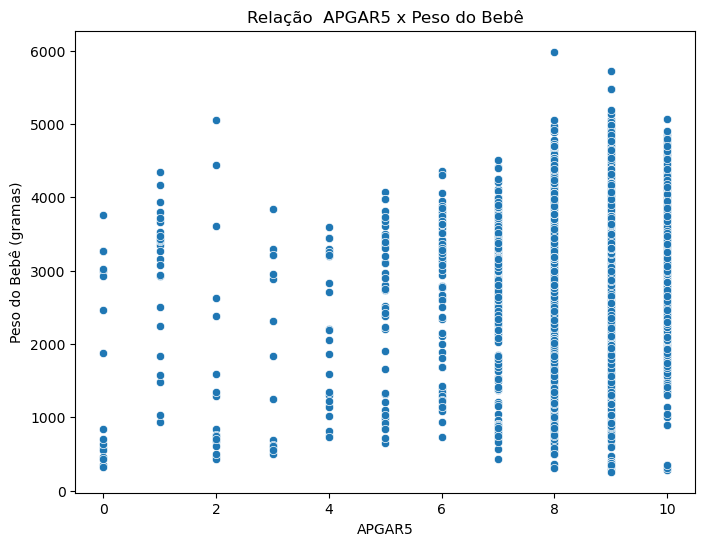

In [85]:
# SCATTERPLOT

plt.figure(figsize=(8, 6))
sns.scatterplot(x='APGAR5', y='PESO', data=df_sinasci)

plt.title('Relação  APGAR5 x Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')

plt.show()



C:\Users\Cristina Notebook\AppData\Local\Temp\ipykernel_13908\3941146345.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='apgar5_cat', y='PESO'
C:\Users\Cristina Notebook\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


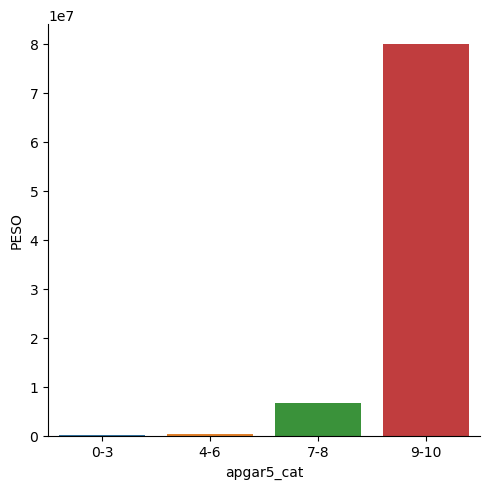

In [86]:
# CATPLOT

sns.catplot(x='apgar5_cat', y='PESO'
            , kind='bar'
            , estimator = sum
            , data=df_sinasci
            , ci = None
           )
